# 数据加载

In [1]:
# 导入包

# 自动重新加载更改后的Python模块
%load_ext autoreload
%autoreload 2

try:
    from google.colab import drive
    import os
    drive.mount('/content/drive')
    GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'ConvNetFromScratch'
    GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
    print(os.listdir(GOOGLE_DRIVE_PATH))
    import sys
    sys.path.append(GOOGLE_DRIVE_PATH)
except:
    pass

import time, os, torch, torchvision, random, time, math
from torch import Tensor
import torchvision
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 10
from toolset import *
from toolset.utils import *
from toolset.data import *
from toolset.helper import *
from toolset.solver import *
from convolutional_networks import *
from fully_connected_networks import *

if torch.cuda.is_available:
    print('Good to go!')

Good to go!


cuda
训练数据集的形态: torch.Size([60000, 1, 28, 28])


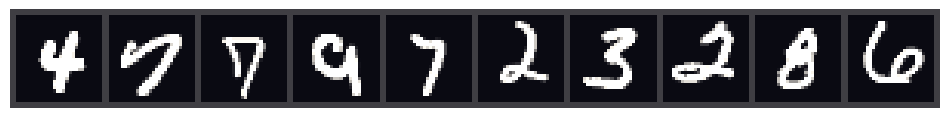

In [2]:
# 数据加载
train_data, train_labels, test_data, test_labels = get_mnist_data()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
train_data = train_data.to(device)
train_labels = train_labels.to(device)
test_data = test_data.to(device)
test_labels = test_labels.to(device)

data_dict = {
    'X_train': train_data,
    'y_train': train_labels,
    'X_val': test_data,
    'y_val': test_labels,
}
print("训练数据集的形态:", train_data.shape)
clear()

tensor_to_imggrid_show(test_data[:10])


# 训练与保存

In [4]:
reset_seed(0)
net = ThreeLayerConvNet(
    input_dims = (1, 28, 28),
    num_filters = 32,
    hidden_dim = 128,
    num_classes = 10,
    weight_scale = 1e-3,
    reg = 1e-5,
    device='cuda'
)
solver = Solver(net, data_dict,
                num_epochs=1, batch_size=50,
                optim_config={
                'learning_rate': 0.001,
                },
                update_rule=adam,
                verbose=True, device='cuda',print_every=100)

In [5]:
reset_seed(0)
solver.train(time_limit=600)
# 你的模型应该能达到95%+准确率

(用时 1.63s; 迭代次数1 / 1200) loss: 2.302594
(Epoch 0 / 1, train 准确率: 10.80%, val准确率: 9.80%
更新:当前准确率9.80, 大于之前的最佳准确率0.00

(用时 2.13s; 迭代次数101 / 1200) loss: 0.222075
(用时 2.60s; 迭代次数201 / 1200) loss: 0.291606
(用时 3.05s; 迭代次数301 / 1200) loss: 0.081643
(用时 3.52s; 迭代次数401 / 1200) loss: 0.104331
(用时 3.99s; 迭代次数501 / 1200) loss: 0.111287
(用时 4.44s; 迭代次数601 / 1200) loss: 0.114266
(用时 4.90s; 迭代次数701 / 1200) loss: 0.070255
(用时 5.35s; 迭代次数801 / 1200) loss: 0.189153
(用时 5.81s; 迭代次数901 / 1200) loss: 0.015657
(用时 6.26s; 迭代次数1001 / 1200) loss: 0.085352
(用时 6.70s; 迭代次数1101 / 1200) loss: 0.080768
(Epoch 1 / 1, train 准确率: 97.80%, val准确率: 97.75%
更新:当前准确率97.75, 大于之前的最佳准确率9.80



In [6]:
# 保存权重模型
model_path = 'mnist_model.pth'
net.save(model_path)

Saved in mnist_model.pth


# 加载模型,测试准确率

In [7]:
# 加载检测
from convolutional_networks import ThreeLayerConvNet

model_path = 'mnist_model.pth'
device = 'cuda'
net_mnist = ThreeLayerConvNet(device=device)
net_mnist.load(model_path ,device='cuda')  #

load model in cuda!
load checkpoint file: mnist_model.pth


In [8]:
# 检验验证集准确率
from toolset.solver import Solver
solver_checker = Solver(net_mnist, data_dict,optim_config={
                'learning_rate': 0.001,
                },device=device)
acc = solver_checker.check_accuracy(data_dict['X_val'],data_dict['y_val'])
print(f"acc:{acc*100:.2f}%")

acc:97.75%


# 可视化推理结果

In [9]:
device = 'cpu'
net_mnist = ThreeLayerConvNet(device=device)
net_mnist.load("mnist_model.pth",device=device)

load model in cpu!
load checkpoint file: mnist_model.pth


torch.float32
tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  45., 169., 205., 199., 163., 100.,  33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  86., 210., 187., 200., 235., 249., 227., 141.,  32.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  13.,  42.,   5.,   8.,  36.,  94

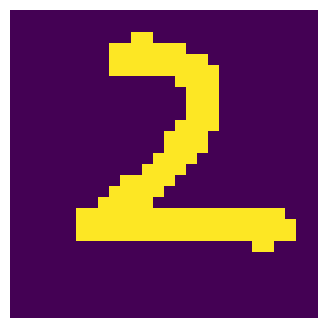

torch.float32
tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  17.,  74.,  88., 101.,  99., 100.,  98.,  77.,  46.,  40.,  35.,  39.,  60.,  54.,   4.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  86., 200., 223., 248., 243., 244., 246

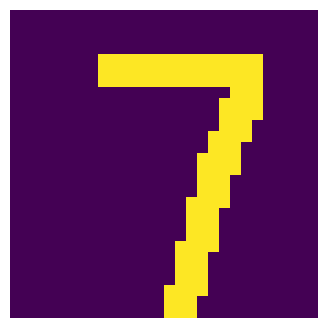

torch.float32
tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,  31.,  71.,  13.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  75., 176., 210., 237., 180.,  84.,  74.,  33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  37., 151., 233., 212., 150., 177

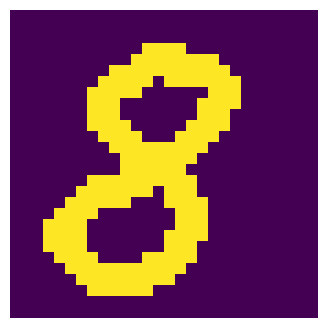

In [10]:
# 画笔测试
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import torch
# 创建Tkinter主窗口
root = tk.Tk()

# 创建一个Canvas，用户可以在上面绘制数字
canvas_size = 280  # canvas的大小
canvas = tk.Canvas(root, width=canvas_size, height=canvas_size, bg='black')
canvas.pack()

# 创建一个PIL Image对象和一个ImageDraw对象，我们会在这个Image对象上进行绘图
img = Image.new('L', (canvas_size, canvas_size), 0)
draw = ImageDraw.Draw(img)

# 定义鼠标拖动事件的处理函数，用于绘图
def draw_digit(event):
    radius = 9  # 设置画笔粗细
    x1, y1 = (event.x - radius), (event.y - radius)
    x2, y2 = (event.x + radius), (event.y + radius)
    canvas.create_oval(x1, y1, x2, y2, fill='white', outline='white')
    draw.ellipse([x1, y1, x2, y2], fill='white', outline='gray')



canvas.bind('<B1-Motion>', draw_digit)

def detect_func(x:Tensor):  
    # (28,28)
    print(x.dtype) 
    torch.set_printoptions(threshold=99999999, linewidth=9999999)
    print(x)
    x.unsqueeze_(0) # (1,28,28)
    
    plt.imshow(tensor_to_image(x))
    plt.axis("off")
    plt.show()
    
    x.unsqueeze_(0) # (1, 1, 28, 28)
    
    # 归一化，参数从mnist的数据集上统计得来
    mean = 0.1307
    std = 0.3081
    x = (x - mean) / std

    return (net_mnist.loss(x).argmax()).item()

# 定义“检测”按钮的回调函数
def detect():
    # 重新调整图像大小并转换为numpy数组
    img_resized = img.resize((28, 28))
    img_array = np.array(img_resized)

    # 转换为PyTorch Tensor，注意类型和设备
    img_tensor = torch.from_numpy(img_array).to(device).to(torch.float32)

    # 调用detect函数
    digit = detect_func(img_tensor)

    # 更新label显示检测结果
    label.config(text=str(digit))

# 创建一个按钮，点击时会调用detect函数
detect_button = tk.Button(root, text='Detect', command=detect)
detect_button.pack()

# 定义“清除”按钮的回调函数
def clear_canvas():
    canvas.delete('all')
    draw.rectangle([0, 0, canvas_size, canvas_size], fill=0)

# 创建一个按钮，点击时会清除Canvas
clear_button = tk.Button(root, text='Clear', command=clear_canvas)
clear_button.pack()

# 创建一个标签，用于显示检测结果
label = tk.Label(root, text='Detect Result')
label.pack()

# 开始Tkinter的主循环
root.mainloop()
